<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Week11/Nhan_Dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils.image_utils import img_to_array


In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
folder = '/content/drive/MyDrive/Colab Notebooks/Nhan_dien/'
photos, labels = list(), list()

In [112]:
#tạo data:
for file in listdir(folder):
  output = 0.0
  if file.startswith('CHI'):
    output = 1.0
  if file.startswith('CHUONG'):
    output= 2.0
  if file.startswith('CUONG'):
    output = 3.0
  if file.startswith('DANG'):
    output = 4.0
  if file.startswith('DONG'):
    output = 5.0
  if file.startswith('DUY'):
    output = 6.0
  if file.startswith('HIEU'):
    output = 7.0
  if file.startswith('HOAN'):
    output = 8.0
  if file.startswith('KHANH'):
    output = 9.0
  if file.startswith('LOC'):
    output = 10.0
  if file.startswith('MTRI'):
    output = 11.0
  if file.startswith('NHU'):
    output = 12.0
  if file.startswith('NHUY'):
    output = 13.0  
  if file.startswith('PDAT'):
    output = 14.0 
  if file.startswith('PHONG'):
    output = 15.0 
  if file.startswith('THANG'):
    output = 16.0 
  if file.startswith('Thanh'):
    output = 17.0 
  if file.startswith('TPHI'):
    output = 18.0
  if file.startswith('TTRI'):
    output = 19.0 
  if file.startswith('TUNG'):
    output = 20.0
  if file.startswith('VDBINH'):
    output = 21.0  
  if file.startswith('VIET'):
    output = 22.0 
  if file.startswith('VINH'):
    output = 23.0 
  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)   
labels = asarray(labels)   


In [91]:
save('/content/drive/MyDrive/NhanDien/NHAN_DIEN_photos.npy', photos)
save('/content/drive/MyDrive/NhanDien/NHAN_DIEN_photo2.npy', labels)

In [92]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/NhanDien/NHAN_DIEN_photos.npy')
labels = np.load('/content/drive/MyDrive/NhanDien/NHAN_DIEN_photo2.npy')


In [113]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành hai tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.15, random_state=42)

In [114]:
print(x_train.shape, x_test.shape)
print(y_test.shape, y_train.shape)

(1123, 30, 40, 3) (199, 30, 40, 3)
(199,) (1123,)


In [115]:
x_train = x_train.reshape(1123, 30,40,3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(199, 30,40,3)
x_test = x_test.astype('float32')/255

In [116]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [117]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam
from keras import losses
batch_size = 32
epochs = 50
classes = 24
loss = losses

In [118]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(30,40,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [119]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))


In [120]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [121]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))



In [122]:
#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose= 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

1/1 [==============================] - 0s 45ms/step


array([5])

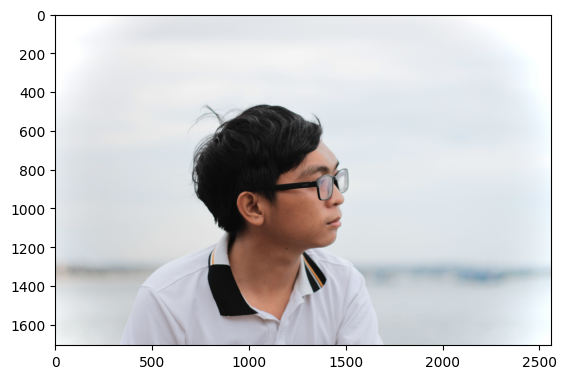

In [125]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

url = '/content/drive/MyDrive/HaoDong/HD.jpg'
img = load_img(url)
plt.imshow(img)

img = load_img(url, target_size = (30,40))
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)

1/1 [==============================] - 0s 55ms/step


array([13])

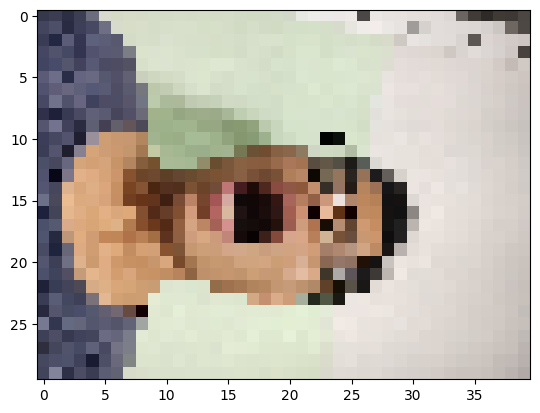

In [49]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('/content/drive/MyDrive/HaoDong/NHUY (66).jpg', target_size = (30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)

Test loss: 0.0309893935918808
Test accuracy:  0.9949748516082764


Text(0.5, 1.0, 'Training & Testing Accuracy')

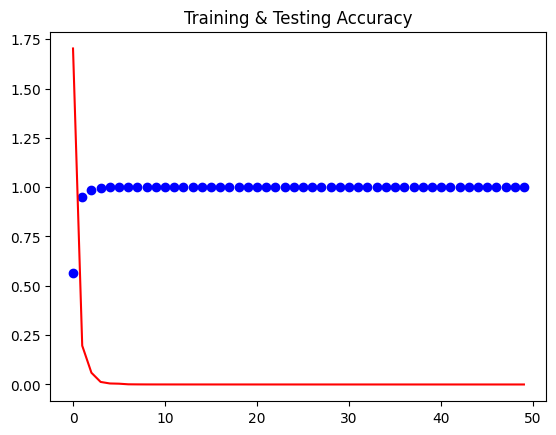

In [123]:
eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy: ', eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, val_accuracy, 'red', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [126]:
model.save('/content/drive/MyDrive/NhanDien/model_recornize.h5')